In [1]:
from keras.models import Sequential
from keras.layers.core import Dense, Activation,Dropout
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import preprocessing
#from sklearn.preprocessing import StandardScaler
import pandas as pd
import keras
import numpy as np
import matplotlib.pyplot as plt
import itertools
##porcentajes
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import average_precision_score
##
from sklearn.model_selection import KFold
%matplotlib inline  

C:\Users\Edison Velasco\Anaconda3\envs\ambiente\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [15]:
#data_train=pd.read_csv("Dataset.csv")
data_train=pd.read_csv("Dataset_relativos_COMPLETO.csv")
data_train["Nombre"].value_counts()

Vaso01        623
Caja01        464
Botella01     429
Pelota01      419
Botella02     418
Cilindro01    417
Pelota02      399
Name: Nombre, dtype: int64

In [16]:
y_train=data_train[data_train.columns[-1]]
data_names=[]
for i in data_train[data_train.columns[0]]:
    if i not in data_names:
        data_names.append(i)
#data_train=data_train[data_train.columns[3:19]]#para solo datos de posiciones articulares
#data_train=data_train[data_train.columns[19:-1]]#para solo datos de sensores Tekscan
data_train=data_train[data_train.columns[3:-1]]#para datos de posiciones articulares y de sensores Tekscan

In [17]:
lim=int((data_train.shape)[1])
i=0
cont_eli=0
colum_delet=[]
#while (False):
while (i<lim):
    j=data_train[data_train.columns[i]].as_matrix()
    if min(j) == max(j):
        data_train.drop(data_train[data_train.columns[[i]]],axis=1, inplace=True)
        lim=lim-1           
        colum_delet.append(cont_eli+i)
        cont_eli=cont_eli+1
    else:
        i=i+1
print (colum_delet)
#min_max_scaler = preprocessing.MinMaxScaler()
#np_scaled = min_max_scaler.fit_transform(data_train)#Normalizado

stand_scaler = preprocessing.StandardScaler()
np_scaled = stand_scaler.fit_transform(data_train) #Normalizado

#convierto nuevamente a formato de PADAS para visualizacion
datos_x = pd.DataFrame(np_scaled) 



[33, 34, 37, 38, 41, 42, 44, 45, 46, 47, 52, 53, 54, 55, 60, 61, 62, 63, 66, 68, 69, 70, 71, 89, 90, 91, 93, 94, 95, 96, 97, 98, 99]


In [18]:
##Guardar archivo de columnas eliminadas para futuras predicciones
file_columns=open('colum_delet.csv','w')
file_columns.write(str(colum_delet))
file_columns.close()

In [19]:
x_train,x_test, y_train, y_test0 =train_test_split(datos_x.as_matrix(),y_train.as_matrix(),test_size=0)
print(np.count_nonzero(y_test0==1))
print(np.count_nonzero(y_test0==2))
print(np.count_nonzero(y_test0==3))
print(np.count_nonzero(y_test0==4))
print(np.count_nonzero(y_test0==5))
print(np.count_nonzero(y_test0==6))
print(np.count_nonzero(y_test0==7))
#Cambiar matrices a Formato para entrenamiento con ANN 
y_t=(np.asarray([[i] for i in y_train],dtype=np.int)-1)
y_ent=keras.utils.to_categorical(y_t, num_classes=7)
y_te=np.asarray([[i] for i in y_test0],dtype=np.int)-1
y_test=keras.utils.to_categorical(y_te, num_classes=7)

0
0
0
0
0
0
0


In [20]:
input_dim=x_train.shape[1]
input_dim

67

In [21]:
k_fold = KFold(5)
X=x_train
y=y_train

In [22]:
for k, (train, test) in enumerate(k_fold.split(X, y)):
    
    model = Sequential() #envoltura para el modelo
    model.add(Dense(100, activation='relu', input_dim=x_train.shape[1]))
    model.add(Dense(1000, activation='relu'))
    model.add(Dense(50, activation='relu'))
    #uints dimension espacio de salida, https://keras.io/layers/core/
    model.add(Dense(7, activation='softmax'))
    model.compile(loss=keras.losses.categorical_crossentropy,
                optimizer=keras.optimizers.Adadelta(lr=1, rho=0.98, epsilon=1e-6, decay=0.001),metrics=['accuracy'])

    y_t=(np.asarray([[i] for i in y],dtype=np.int)-1)    
    y_ent=keras.utils.to_categorical(y_t[train], num_classes=7)
    
    history=model.fit(X[train],y_ent,epochs=20,batch_size=32)
    pred=model.predict_on_batch(X[test]) #predicciones para calcular accuracy por validacion cruzada
    prediccion=[]
    for i in pred:
        prediccion.append(np.argmax(i))
    real=y[test]-1
    
    c_matrix=confusion_matrix(real,prediccion)#reales vs prediccion
    FP = c_matrix.sum(axis=0) - np.diag(c_matrix)  
    FN = c_matrix.sum(axis=1) - np.diag(c_matrix)
    TP = np.diag(c_matrix)
    TN = c_matrix.sum() - (FP + FN + TP)
    Acc = (TP+TN)/(TP+FP+FN+TN)
    Pre = (TP)/(TP+FP)
    Re = (TP)/(TP+FN)
    F1 = 2*(Pre*Re)/(Pre+Re)
    #print('Accuracy: '+ str(Acc.sum()/7))
    #print('Precision: '+ str(Pre.sum()/7))#real vs predicho
    #print('Recall: '+ str(Re.sum()/7))
    #print('F1 score: ' +str(F1.sum()/7))
    
    print('Accuracy: '+ str(accuracy_score(prediccion,real)))
    print('Precision: '+ str(precision_score( prediccion, real,  average = 'macro' )))#real vs predicho
    print('Recall: '+ str(recall_score( prediccion,real,  average = 'macro' )))
    print('F1 score: ' +str(f1_score( prediccion, real, average = 'macro' )))
    if k<4:
        del model
#
#

Epoch 1/20
2535/2535 [==============================] - 1s 315us/step - loss: 0.6983 - acc: 0.7850
Epoch 2/20
2535/2535 [==============================] - 0s 120us/step - loss: 0.2546 - acc: 0.9179
Epoch 3/20
2535/2535 [==============================] - 0s 124us/step - loss: 0.1536 - acc: 0.9511
Epoch 4/20
2535/2535 [==============================] - 0s 128us/step - loss: 0.1017 - acc: 0.9665
Epoch 5/20
2535/2535 [==============================] - 0s 119us/step - loss: 0.0654 - acc: 0.9830
Epoch 6/20
2535/2535 [==============================] - 0s 117us/step - loss: 0.0488 - acc: 0.9846
Epoch 7/20
2535/2535 [==============================] - 0s 121us/step - loss: 0.0370 - acc: 0.9893
Epoch 8/20
2535/2535 [==============================] - 0s 119us/step - loss: 0.0274 - acc: 0.9941
Epoch 9/20
2535/2535 [==============================] - 0s 116us/step - loss: 0.0217 - acc: 0.9957
Epoch 10/20
2535/2535 [==============================] - 0s 121us/step - loss: 0.0157 - acc: 0.9980
Epoch 11/

2535/2535 [==============================] - 0s 97us/step - loss: 0.0015 - acc: 1.0000
Epoch 20/20
2535/2535 [==============================] - 0s 99us/step - loss: 0.0013 - acc: 1.0000
Accuracy: 0.9589905362776026
Precision: 0.959783612729515
Recall: 0.9582640418547353
F1 score: 0.9587841714955656
Epoch 1/20
2536/2536 [==============================] - 1s 329us/step - loss: 0.7255 - acc: 0.7701
Epoch 2/20
2536/2536 [==============================] - 0s 99us/step - loss: 0.2659 - acc: 0.9160
Epoch 3/20
2536/2536 [==============================] - 0s 105us/step - loss: 0.1585 - acc: 0.9495
Epoch 4/20
2536/2536 [==============================] - 0s 106us/step - loss: 0.1011 - acc: 0.9716
Epoch 5/20
2536/2536 [==============================] - 0s 95us/step - loss: 0.0788 - acc: 0.9771
Epoch 6/20
2536/2536 [==============================] - 0s 95us/step - loss: 0.0543 - acc: 0.9850
Epoch 7/20
2536/2536 [==============================] - 0s 97us/step - loss: 0.0344 - acc: 0.9917
Epoch 8/20


dict_keys(['loss', 'acc'])


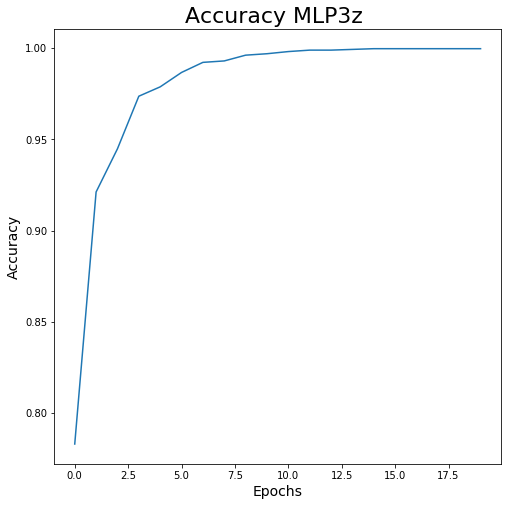

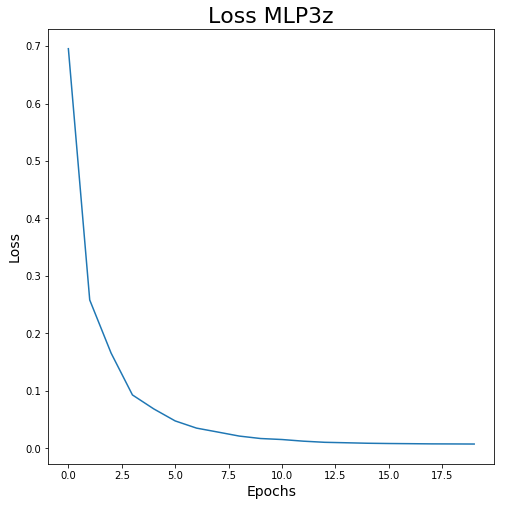

In [10]:
# list all data in history
plt.figure(figsize=(8,8))
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.title('Accuracy MLP3z ', fontsize=22)
plt.ylabel('Accuracy', fontsize=14)
plt.xlabel('Epochs', fontsize=14)
plt.show()
plt.figure(figsize=(8,8))
# summarize history for loss
plt.plot(history.history['loss'])
plt.title('Loss MLP3z', fontsize=22)
plt.ylabel('Loss', fontsize=14)
plt.xlabel('Epochs', fontsize=14)
plt.show()

In [11]:
score = model.evaluate(x_test, y_test)
score

[]

In [12]:
a=model.predict_on_batch(x_test)
#model.save('model_articular.h5')
model.save('model_relativo.h5')

In [13]:
real=[]
prediccion=[]
for i in a:
    prediccion.append(np.argmax(i))
for j in y_test:
    real.append(np.argmax(j))

In [14]:
c_matrix=confusion_matrix(real,prediccion)#reales vs prediccion
FP = c_matrix.sum(axis=0) - np.diag(c_matrix)  
FN = c_matrix.sum(axis=1) - np.diag(c_matrix)
TP = np.diag(c_matrix)
TN = c_matrix.sum() - (FP + FN + TP)
Acc = (TP+TN)/(TP+FP+FN+TN)
Pre = (TP)/(TP+FP)
Re = (TP)/(TP+FN)
F1 = 2*(Pre*Re)/(Pre+Re)
print('Accuracy: '+ str(accuracy_score(prediccion,real)))
print('Precision: '+ str(precision_score( prediccion, real,  average = 'macro' )))#real vs predicho
print('Recall: '+ str(recall_score( prediccion,real,  average = 'macro' )))
print('F1 score: ' +str(f1_score( prediccion, real, average = 'macro' )))

Accuracy: nan
Precision: nan
Recall: nan
F1 score: nan


C:\Users\Edison Velasco\Anaconda3\envs\ambiente\lib\site-packages\numpy\lib\function_base.py:1128: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
C:\Users\Edison Velasco\Anaconda3\envs\ambiente\lib\site-packages\numpy\core\_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [33]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

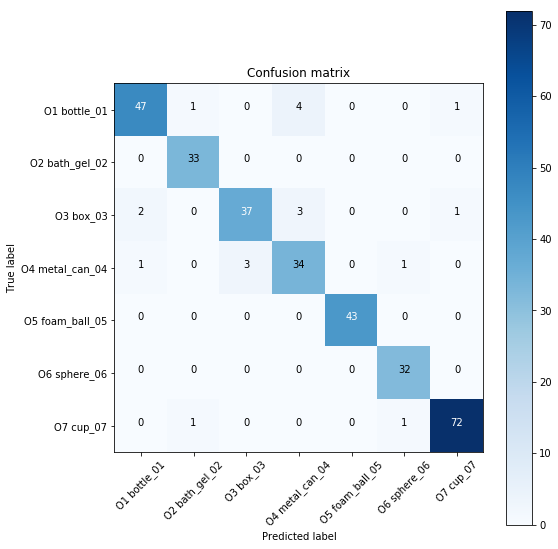

In [34]:
plt.figure(figsize=(8,8))
plot_confusion_matrix(c_matrix,classes=data_names,normalize=False)

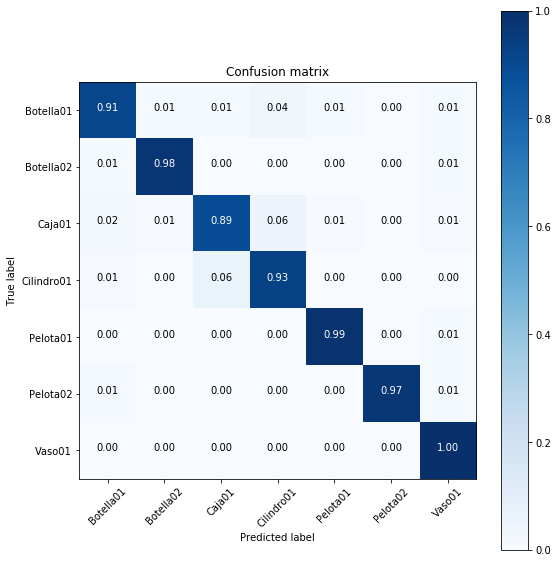

In [108]:
plt.figure(figsize=(8,8))
plot_confusion_matrix(c_matrix,classes=data_names,normalize=True)